datasetlink : https://www.kaggle.com/itssuru/super-store 

The above one is dataset link which I have choosen from kaggle website 

# Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Defining the functions

In [2]:
def data_loading(file_name):
    '''This Function is for reading the data and finally it return the data frame also'''
    data = pd.read_csv(file_name)
    return data

In [3]:
def pre_processing(data):
    '''This function print the shape of data and it prints the null values count'''
    shape = data.shape
    print("Shape of Data Frame is" , shape)
    Null_values_count = data.isnull().sum()
    print("Null Values Count in this data frame",Null_values_count)

In [4]:
def get_statistics(data):
    '''This function provides the statistics of data after taking the data frame'''
    print(data.describe())

In [5]:
def countplot(column,title):
    '''This function provides the count plot for providing this plot it takes the column name that is 
    present in data frame and title'''
    
    sns.countplot(column)
    plt.title(title)

In [6]:
def pie_chart(labels,list,title):
    '''This function provides the pie chart afer taking the lables and their values and title for graph'''
    explode = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
    le = len(list)
    plt.figure()
    plt.pie(list , labels = labels ,shadow = True ,explode = (0.1,0.1,0.1) ,autopct = '%1.2f%%')
    plt.title(title)
    plt.show()

    
    

In [7]:
def boxplot(x, y,data,title):
    '''This provides the box plot by considering the columns data and title for graph'''
    sns.boxplot(data=data,x=x,y=y)
    plt.title(title)
    

In [8]:
def bargraph(y_pos,performance,objects,x_label,y_label,alpha,title):
    '''This function provides the bar graph with center alignment(by default). This function takes the y_pos and objects  and performance from the user
    This function takes the x_label and y_label also from the user while calling the function and alpha value also and title for graph '''
    plt.figure(figsize =(12,6))
    plt.barh(y_pos,performance,align='center',alpha = alpha)
    plt.yticks(y_pos,objects)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    

First I am going to read the data using data_loading function which is defined by me in the above cells and store that in df variable.

In [9]:
df = data_loading("C://Users//Dell//Desktop//super_store//SampleSuperstore.csv")

Here I am going to call the preprocessing function to checking the data frame shape and null values count 

In [10]:
pre_processing(df)

Shape of Data Frame is (9994, 13)
Null Values Count in this data frame Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


Based upon the above data I came to know that data consists of 0 null values

Here I am going to call the get_statistics method for knowing the basic statistics of data

In [11]:
get_statistics(df)

        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.857901     3.789574     0.156203    28.656599
std    32063.693350    623.245124     2.225110     0.206452   234.260115
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000


Based upon above data I am going to find the profit% by using the sales and profit column in dataframe

In [12]:
# Calculating the Profit Percentage
df['Profit%'] = (df['Profit']/df['Sales'])*100

Here I am Just checking the profit% 

In [13]:
df.head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit%
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136,16.0
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820,30.0
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714,47.0


Now I am going the plot the counter plot for Segment column because counter plot gives the count of each segements based upon that we can easily know the count of each segement.

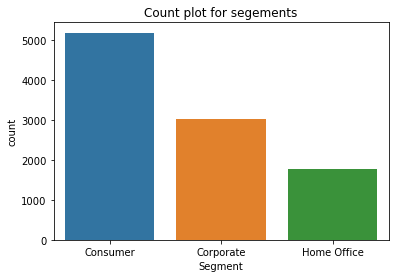

In [14]:
countplot(df['Segment'],"Count plot for segements")

Based upon the above plot I came to know that Consumer segement is high compare to other segments

Now I am going the plot the Profit% for each segement by using the pie-chart function before ploting the data i need to pass the labels and list.

So here I am going to calculate the labels and list 

In [15]:
# Separating data for analysis
superstore_Consumer = df[df['Segment'] == 'Consumer']
superstore_Corporate = df[df['Segment'] == 'Corporate']
superstore_Home_office = df[df['Segment'] == 'Home Office']

labels = ['Consumer','Corporate','Home Office']
list = [np.mean(superstore_Consumer['Profit%']),np.mean(superstore_Corporate['Profit%']),np.mean(superstore_Home_office['Profit%'])]

By using the above calculated labels and list I am going to plot the pie chart because it displays the relative proportions of multiple classes of data.

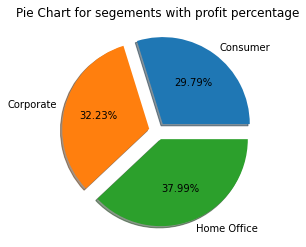

In [16]:
pie_chart(labels,list,"Pie Chart for segements with profit percentage")

Now I am going to findout the statistics of the profit% columns for consumer segment

In [17]:
get_statistics(superstore_Consumer['Profit%'])

count    5191.000000
mean       11.204102
std        47.846214
min      -275.000000
25%         6.250000
50%        27.000000
75%        36.250000
max        50.000000
Name: Profit%, dtype: float64


Now I am going to findout the bar graph for Profit Percentage and Profit Percentage by Sub Category

For this first I need to findout the Profit y_pos and list for getting the graph

In [18]:
#Calculating the Average_profit for each sub-category
average_profit = superstore_Consumer.groupby('Sub-Category')['Profit%'].mean()
average_profit = pd.DataFrame(average_profit)
average_profit

,Profit%
Sub-Category,
Accessories,20.453606
Appliances,-20.997268
Art,24.722547
Binders,-21.393269
Bookcases,-15.949371
Chairs,4.266705
Copiers,29.128571
Envelopes,41.767442
Fasteners,31.754386


In [19]:
objects = average_profit.index

y_pos = np.arange(len(objects))
performance = average_profit['Profit%']


Here I am going to plot the Bar graph by using the above calculated values. While telling the story on data for non technical persons also bar graph provides good understanding about data.

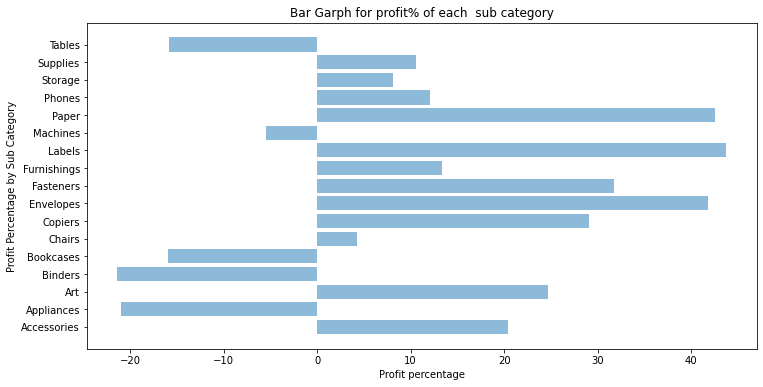

In [22]:
bargraph(y_pos,performance,objects,"Profit percentage","Profit Percentage by Sub Category",0.5,"Bar Garph for profit% of each  sub category")

Based upon the above plot I came to know that Tables, Machines,Bookcases,Binders and Appliances making the negative profit

Now I am going to findout the in which region more negative profit is occurs using boxplot. The advantage of boxplot is it spreads the data points based upon range. so we can clearly observe the data points.

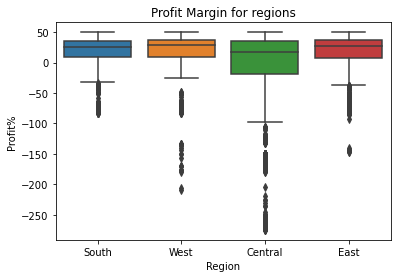

In [24]:
boxplot("Region","Profit%",df,"Profit Margin for regions")

Especially In Central region we observe the negative profit margin